<a href="https://colab.research.google.com/github/jainaryan644/MAT-422/blob/main/HW1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.2.1 Linear Spaces

In [41]:
import itertools
import numpy as np
import matplotlib.pyplot as plt


In [4]:
#linear combination

a = np.array([1, 2])
b = np.array([3, 1])
c = 2*a - b
print(c)


[-1  3]


In [7]:
# linear subspace and span

a = np.array([1, 2])
b = np.array([3, 1])

scalars = range(-2,3)
span = []

for a1, b1 in itertools.product(scalars, scalars):
    span.append(a*a1 + b*b1)

print(span)
for v in span:
  print(v)

[array([-8, -6]), array([-5, -5]), array([-2, -4]), array([ 1, -3]), array([ 4, -2]), array([-7, -4]), array([-4, -3]), array([-1, -2]), array([ 2, -1]), array([5, 0]), array([-6, -2]), array([-3, -1]), array([0, 0]), array([3, 1]), array([6, 2]), array([-5,  0]), array([-2,  1]), array([1, 2]), array([4, 3]), array([7, 4]), array([-4,  2]), array([-1,  3]), array([2, 4]), array([5, 5]), array([8, 6])]
[-8 -6]
[-5 -5]
[-2 -4]
[ 1 -3]
[ 4 -2]
[-7 -4]
[-4 -3]
[-1 -2]
[ 2 -1]
[5 0]
[-6 -2]
[-3 -1]
[0 0]
[3 1]
[6 2]
[-5  0]
[-2  1]
[1 2]
[4 3]
[7 4]
[-4  2]
[-1  3]
[2 4]
[5 5]
[8 6]


In [26]:
#linear independence

def dependence(a, b):
  print("Vectors are linearly dependent") if np.linalg.det(np.stack((a, b), axis=-1))==0 else print("Vectors are linearly independent")

a = np.array([1, 2])
b = np.array([3, 1])
c = np.array([2, 4])
dependence(a, b)
dependence(a, c)

Vectors are linearly independent
Vectors are linearly dependent


In [29]:
# basis, dimension, and column space

a = np.array([[1, 2], [3, 1]])
rank = np.linalg.matrix_rank(a)
print(rank)

basis = np.linalg.qr(a)[0]
print(basis)


2
[[-0.31622777 -0.9486833 ]
 [-0.9486833   0.31622777]]


1.2.2. Orthogonality

In [31]:
#Dot Product: measure for orthogonality
a = np.array([1,2,3])
b = np.array([4,5,6])
dp = np.dot(a,b)
print("Dot Product is {dp}")


Dot Product is {dp}


In [7]:
#check for orthogonality: if dot product is 0 then vectors are orthogonal
answer = "a and b are orthogonal" if dp == 0 else "a and b are not orthogonal"
print(answer)

a and b are not orthogonal


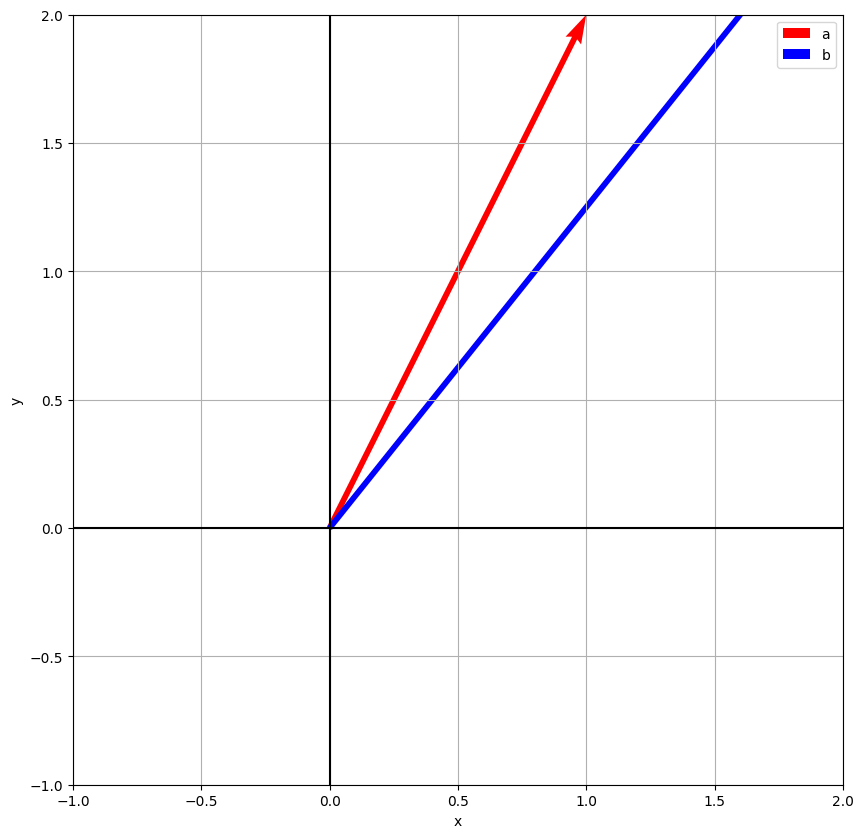

In [11]:
#visualize vectors a and b
plt.figure(figsize=(10,10))
plt.quiver(0,0,a[0],a[1],angles='xy',scale_units='xy',scale=1, color='r', label='a')
plt.quiver(0,0,b[0],b[1],angles='xy',scale_units='xy',scale=1, color='b', label='b')
plt.xlim(-1,2)
plt.ylim(-1,2)

plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid()
plt.legend()

plt.xlabel("x")
plt.ylabel("y")
plt.gca().set_aspect('equal')
plt.show()

Norm is 5.385164807134504


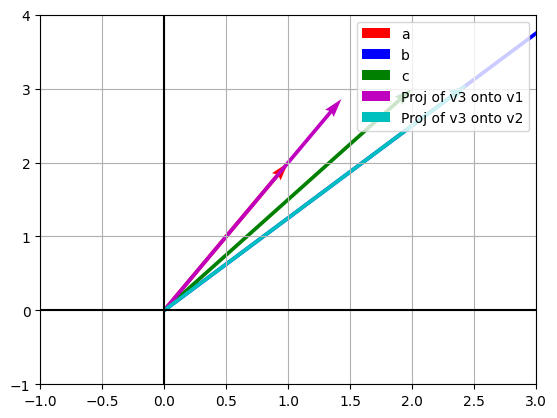

In [33]:
#vector projection
c = np.array([2,3, 4])
norm = np.linalg.norm(c)
print("Norm is", norm)
cp1 = np.dot(a,c) / np.dot(a,a) * a
cp2 = np.dot(b,c) / np.dot(b,b) * b

plt.figure()
plt.quiver(0,0,a[0],a[1],angles='xy',scale_units='xy',scale=1, color='r', label='a')
plt.quiver(0,0,b[0],b[1],angles='xy',scale_units='xy',scale=1, color='b', label='b')
plt.quiver(0,0,c[0],c[1],angles='xy',scale_units='xy',scale=1, color='g', label='c')
plt.quiver(0,0,cp1[0],cp1[1],angles='xy',scale_units='xy',scale=1, color='m', label='Proj of v3 onto v1')
plt.quiver(0,0,cp2[0],cp2[1],angles='xy',scale_units='xy',scale=1, color='c', label='Proj of v3 onto v2')

plt.xlim(-1,3)
plt.ylim(-1,4)

plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid()
plt.legend()
plt.show()

1.2.3 Gram-Schmidt process

In [43]:
def gram_schmidt(X):
  Y = np.zeros_like(X, dtype=float)
  for i in range(X.shape[0]):
    y = X[i]
    for j in range(i):
      if np.dot(Y[j], Y[j]) == 0:
        continue
      proj = np.dot(y, Y[j]) * Y[j] / np.dot(Y[j], Y[j])
      y = y- proj
    if np.linalg.norm(y) > 1e-10:
      Y[i] = y / np.linalg.norm(y)
  return Y

X = np.array([[1, 1, 0], [1, 0, 1], [0, 1, 1]])
Y = gram_schmidt(X)
print(X)
print(""".
.
.
.
.
.
""")
print(Y)

[[1 1 0]
 [1 0 1]
 [0 1 1]]
.
.
.
.
.
.

[[ 0.70710678  0.70710678  0.        ]
 [ 0.40824829 -0.40824829  0.81649658]
 [-0.57735027  0.57735027  0.57735027]]


1.2.4. Eigenvalues and eigenvectors

In [46]:
#eigen function
a = np.array([[4, 1, 1], [1, 4, 1], [1, 1, 4]])
values, vectors = np.linalg.eig(a)
print("Matrix a:", a)
print("Eigenvalues:", values)
print("Eigenvectors:\n", vectors)

Matrix a: [[4 1 1]
 [1 4 1]
 [1 1 4]]
Eigenvalues: [6. 3. 3.]
Eigenvectors:
 [[-0.57735027 -0.81649658 -0.15430335]
 [-0.57735027  0.40824829 -0.6172134 ]
 [-0.57735027  0.40824829  0.77151675]]


In [48]:
#diagonalization

d = np.diag(values)
print("diagonal matrix d:", d)

inveig = np.linalg.inv(vectors)
print("inverse of eigenvectors:\n", inveig)

newA = vectors @ d @ inveig
print("newA:\n", newA)

diagonal matrix d: [[6. 0. 0.]
 [0. 3. 0.]
 [0. 0. 3.]]
inverse of eigenvectors:
 [[-5.77350269e-01 -5.77350269e-01 -5.77350269e-01]
 [-8.16496581e-01  5.44331054e-01  2.72165527e-01]
 [ 1.75879429e-15 -7.20082300e-01  7.20082300e-01]]
newA:
 [[4. 1. 1.]
 [1. 4. 1.]
 [1. 1. 4.]]
